### Load data

In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

breast_cancer = datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
target = pd.Series(breast_cancer.target, name='target')
df = pd.concat([data, target], axis=1)

### Create a TabularMagic object

In [2]:
from tabularmagic.api import TabularMagic
tm = TabularMagic(df, test_size=0.3, name='Breast cancer sklearn dataset')

INFO: Initialization complete. Shapes of train, test DataFrames: (398, 31), 
      (171, 31). 


### Exploratory data analysis

In [3]:
tm.eda().continuous_summary_statistics()

,meanradius,meantexture,meanperimeter,meanarea,meansmoothness,meancompactness,meanconcavity,meanconcavepoints,meansymmetry,meanfractaldimension,radiuserror,textureerror,perimetererror,areaerror,smoothnesserror,compactnesserror,concavityerror,concavepointserror,symmetryerror,fractaldimensionerror,worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcavepoints,worstsymmetry,worstfractaldimension,target
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,0.111500,0.360200,0.757000,6.802000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000895,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,2.873000,3.647000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.061460,0.029840,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.903400,0.275600,0.663800,0.173000,1.000000
mean,14.176078,19.159171,92.256332,659.770854,0.095962,0.103303,0.088071,0.048440,0.180308,0.062664,0.404789,1.203627,2.875302,40.597329,0.007054,0.025356,0.032259,0.011926,0.020372,0.003791,16.287322,25.505553,107.363844,881.848241,0.131772,0.249086,0.268497,0.113839,0.288300,0.083537,0.625628
std,3.535730,4.214074,24.289529,358.865452,0.013766,0.051209,0.077836,0.037712,0.026871,0.007248,0.290452,0.519348,2.114108,48.883639,0.003114,0.017995,0.030055,0.006234,0.008016,0.002651,4.799691,6.017564,33.083204,570.753903,0.023023,0.148622,0.196139,0.063886,0.062318,0.017518,0.484569
variance,12.501385,17.758420,589.981216,128784.412347,0.000190,0.002622,0.006058,0.001422,0.000722,0.000053,0.084363,0.269722,4.469452,2389.610152,0.000010,0.000324,0.000903,0.000039,0.000064,0.000007,23.037038,36.211075,1094.498372,325760.018322,0.000530,0.022088,0.038471,0.004081,0.003884,0.000307,0.234808
skew,1.020942,0.788515,1.071706,1.780828,0.634088,1.029196,1.374224,1.158541,0.710506,1.493977,3.466718,1.302691,3.846859,5.888923,2.633633,1.981286,5.296554,1.707014,2.145523,4.059109,1.142907,0.503990,1.152626,1.961466,0.454646,1.336997,0.853060,0.487419,1.610931,1.371090,-0.519167
kurtosis,1.101042,1.454095,1.260187,4.377761,1.261319,0.981097,1.948908,1.135877,1.278645,3.830137,20.388889,2.635602,24.604923,51.510971,12.522039,5.680064,54.102516,6.553743,6.321593,28.929743,1.137586,0.312484,1.250171,5.061280,0.315390,2.662335,0.218653,-0.557116,5.539011,2.727971,-1.730465
q1,11.752500,16.170000,75.805000,426.175000,0.085550,0.063407,0.029585,0.020692,0.161575,0.057665,0.236150,0.836950,1.679250,18.160000,0.005080,0.012783,0.015180,0.007910,0.015200,0.002252,13.075000,21.070000,84.542500,521.550000,0.114325,0.147325,0.116475,0.063885,0.247775,0.071155,0.000000
median,13.275000,18.700000,85.980000,546.250000,0.094625,0.091280,0.061880,0.034110,0.178800,0.061325,0.319400,1.108000,2.278500,24.830000,0.006413,0.020500,0.026140,0.011160,0.018695,0.003219,14.975000,25.155000,97.745000,687.600000,0.131150,0.209250,0.226200,0.099270,0.280750,0.080165,1.000000


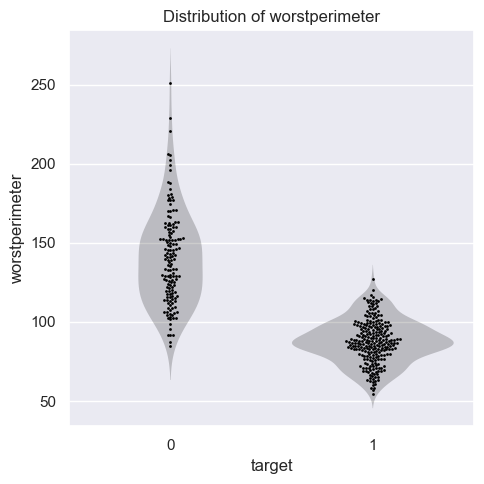

In [4]:
tm.eda().plot_distribution_stratified('worstperimeter', 'target', 
                                      strategy='violin_swarm')

### Preprocess the data

In [5]:
tm.datahandler().load_data_checkpoint().\
    set_y_var('target').\
    force_categorical(['target']).\
    scale(
        tm.datahandler().continuous_vars(ignore_yvar=True),
        strategy='standardize'
    ).save_data_checkpoint('finished preprocessing')

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test 
      DataFrames: (398, 31), (171, 31). 
INFO: Set y_var to target. 
INFO: Forced variables target to categorical. 
INFO: Scaled variables meanradius, meantexture, meanperimeter, meanarea, 
      meansmoothness, meancompactness, meanconcavity, meanconcavepoints, 
      meansymmetry, meanfractaldimension, radiuserror, textureerror, 
      perimetererror, areaerror, smoothnesserror, compactnesserror, 
      concavityerror, concavepointserror, symmetryerror, fractaldimensionerror, 
      worstradius, worsttexture, worstperimeter, worstarea, worstsmoothness, 
      worstcompactness, worstconcavity, worstconcavepoints, worstsymmetry, 
      worstfractaldimension using strategy standardize. 
INFO: Saved working DataFrames checkpoint finished preprocessing. 


Breast cancer sklearn dataset 
--------------------------------------------------------------------------------
Train shape: (398, 31)                  Test shape: (171, 31)                   
--------------------------------------------------------------------------------
Categorical variables:
  target 
                                                                                
Continuous variables:
  meanradius, meantexture, meanperimeter, meanarea, meansmoothness, 
  meancompactness, meanconcavity, meanconcavepoints, meansymmetry, 
  meanfractaldimension, radiuserror, textureerror, perimetererror, areaerror, 
  smoothnesserror, compactnesserror, concavityerror, concavepointserror, 
  symmetryerror, fractaldimensionerror, worstradius, worsttexture, 
  worstperimeter, worstarea, worstsmoothness, worstcompactness, worstconcavity, 
  worstconcavepoints, worstsymmetry, worstfractaldimension 

In [6]:
from tabularmagic.api.mlC import LinearC

tm.datahandler().load_data_checkpoint('finished preprocessing')
report = tm.ml_classification(
    models=[
        LinearC('l1'),
        LinearC('l2')
    ],
    y_var='target',
    X_vars=['worstperimeter', 'worstradius', 'worstarea', 'worstconcavity']
)

INFO: Working DataFrames reset to checkpoint finished preprocessing. Shapes of 
      train, test DataFrames: (398, 31), (171, 31). 
INFO: Fitting model LinearC(l1). 
WARN: Error occured when computing the roc_auc score: y should be a 1d array, 
      got an array of shape (398, 2) instead. This likely occured because y_var 
      is categorical and binary. For binary classification, transform y_var into 
      a (0,1)-valued continuous variable using the Datahandler.force_binary() 
      method. 
WARN: Error occured when computing the roc_auc score: y should be a 1d array, 
      got an array of shape (171, 2) instead. This likely occured because y_var 
      is categorical and binary. For binary classification, transform y_var into 
      a (0,1)-valued continuous variable using the Datahandler.force_binary() 
      method. 
INFO: Fitted model LinearC(l1). 
INFO: Fitting model LinearC(l2). 
WARN: Error occured when computing the roc_auc score: y should be a 1d array, 
      got an ar

In [15]:
type(report)

tabularmagic._src.interactive.classification.mlclass.MLClassificationReport

In [14]:
report.model_report('LinearC(l1)').train_report().fit_statistics()

,LinearC(l1)_train
Statistic,
accuracy,0.934673
f1,0.930638
precision,0.928531
recall,0.932967
roc_auc,NaN
n,398


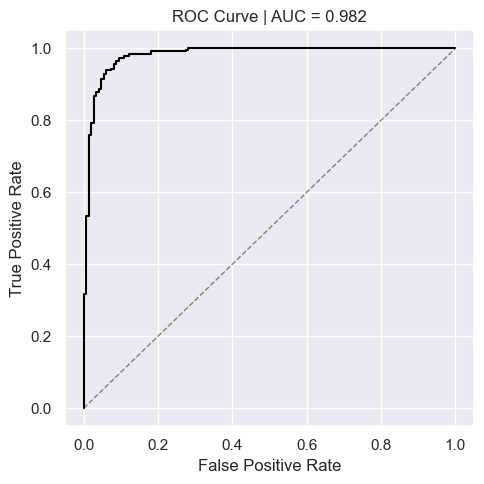

In [8]:
report.model_report('LinearC(l1)').train_report().plot_roc_curve()

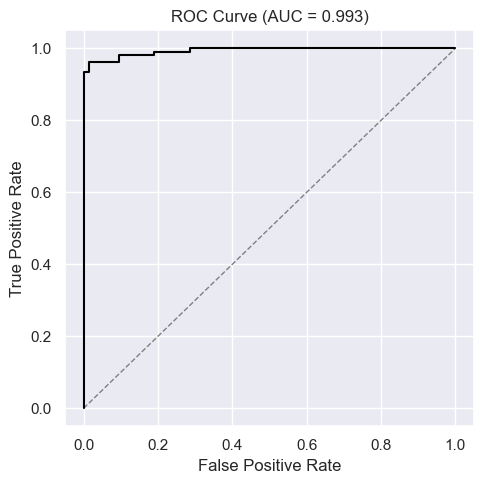

In [13]:
report.model_report('LinearC(l1)').test_report().plot_roc_curve()